# **KNN**

# **Fetching Libraries**

In [1]:
import numpy as np               
import pandas as pd             
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score  
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler  

# **Reading data**

In [16]:
df = pd.read_csv('Dry_Bean_Dataset.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# **Analyze Dataset Columns and Class Proportions**

In [3]:
print(df.columns)
print(df.Class.value_counts())

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


In [4]:
X = df.drop(['Class'], axis='columns')
y = df.Class

In [5]:
print(X.shape)

(13611, 16)


In [6]:
X = pd.get_dummies(X)

# **Separating Data**

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2, stratify=y, random_state=2) 
#data set is split into training and testing data set.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10888, 16)
(10888,)
(2723, 16)
(2723,)


In [8]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
clf = KNeighborsClassifier(n_neighbors=26)
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=26)

# **Training k-Nearest Neighbors Model**

In [10]:
training_accuracy=[]
test_accuracy=[]
validation_accuracy=[]
for k in range(1,30) :
# build the model
  clf = KNeighborsClassifier(n_neighbors=k) 
  clf.fit(X_train_scaled, y_train)
  training_accuracy.append(clf.score(X_train_scaled, y_train)) 
  scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
    
  print("k: ",k, "val acc:", scores.mean())
  validation_accuracy.append(scores.mean())
  test_accuracy.append(clf.score(X_test_scaled, y_test))

k:  1 val acc: 0.9032873858909956
k:  2 val acc: 0.9003496698266084
k:  3 val acc: 0.9177078269324259
k:  4 val acc: 0.9175240034030141
k:  5 val acc: 0.9182596351212661
k:  6 val acc: 0.9188096709069302
k:  7 val acc: 0.9189930724355857
k:  8 val acc: 0.9207382987630315
k:  9 val acc: 0.9199112616809808
k:  10 val acc: 0.9200947476097877
k:  11 val acc: 0.9197281133527792
k:  12 val acc: 0.9191769803651487
k:  13 val acc: 0.9201874189758549
k:  14 val acc: 0.9200035110462916
k:  15 val acc: 0.9210138652568464
k:  16 val acc: 0.9211056926214012
k:  17 val acc: 0.9221159624318046
k:  18 val acc: 0.9208300417274348
k:  19 val acc: 0.9203708205045104
k:  20 val acc: 0.9210135276562417
k:  21 val acc: 0.9216564880084264
k:  22 val acc: 0.9225749304542752
k:  23 val acc: 0.9223914445254685
k:  24 val acc: 0.9211976887862583
k:  25 val acc: 0.9212894317506617
k:  26 val acc: 0.9217483997731325
k:  27 val acc: 0.9211973511856535
k:  28 val acc: 0.9219321389023929
k:  29 val acc: 0.92174865297

In [11]:
clf = KNeighborsClassifier(n_neighbors=26)
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=26)

In [12]:

scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
print(scores)

[0.92011019 0.91735537 0.92286501 0.93204775 0.91735537 0.91000918
 0.91827365 0.93939394 0.91084559 0.92922794]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print("Train Accuracy:", clf.score(X_train,y_train))
print('Test Accuracy', clf.score(X_test, y_test))

Train Accuracy: 0.8093313739897134
Test Accuracy 0.7385236871098053


# **Confusion Matrix**

In [14]:
yPredict = clf.predict(X_test)
cm = confusion_matrix(y_test, yPredict)
tn = cm.ravel()
print(cm)
print(tn)

[[148   0  93   0  22   0   2]
 [  0 104   0   0   0   0   0]
 [106   0 197   0  20   1   2]
 [  0   0   0 643   0  32  34]
 [ 32   0  12   8 273   0  61]
 [  1   0   1  66   5 249  84]
 [  6   0   0  61  44  19 397]]
[148   0  93   0  22   0   2   0 104   0   0   0   0   0 106   0 197   0
  20   1   2   0   0   0 643   0  32  34  32   0  12   8 273   0  61   1
   0   1  66   5 249  84   6   0   0  61  44  19 397]


# **Creating a Plot**

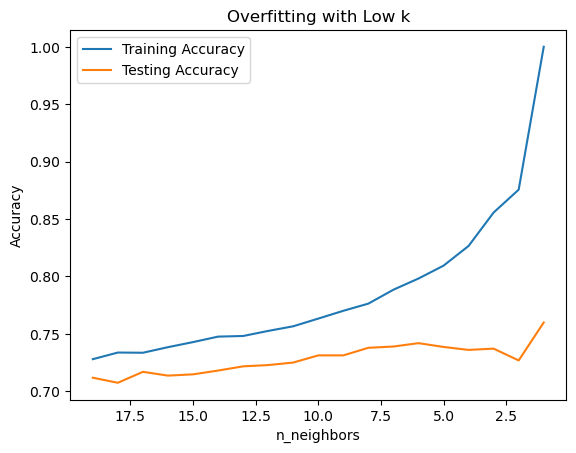

In [15]:
neighbors_range = range(1, 20)
train_accuracies = []
test_accuracies = []

# Loop through each value of k and calculate accuracy
for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))


plt.plot(neighbors_range, train_accuracies, label="Training Accuracy")
plt.plot(neighbors_range, test_accuracies, label="Testing Accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Overfitting with Low k')
ax = plt.gca()
ax.invert_xaxis()
plt.savefig(r'C:\Users\ambat\OneDrive\Documents\plots\kNN.png')
plt.show()